In [4]:
%matplotlib ipympl
from Steering import *
import matplotlib.pyplot as plt
import numpy as np

In [5]:
P_s = np.array([0, 0])
theta_s = np.deg2rad(25)

P_e = np.array([0.5, 0.5])
theta_e = np.deg2rad(-90)

distance = 0.3905, curve = -1.667
distance = 0.6049, curve = 0.0
distance = 2.956, curve = 1.667
Total = 3.9514852884813276


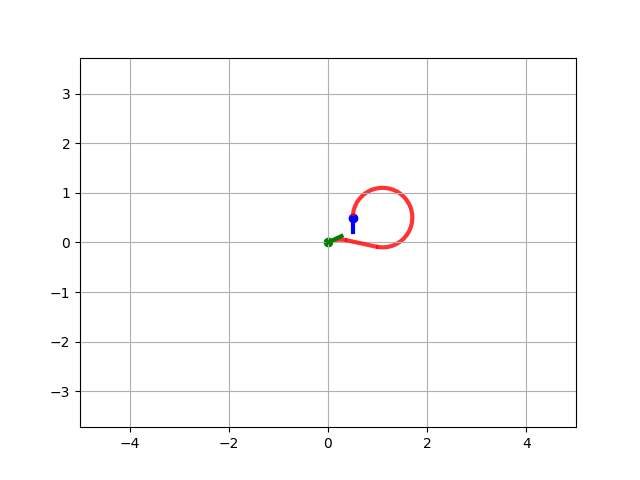

In [6]:
op = optimal_path(P_s, theta_s, P_e, theta_e, 0.6)
op.print()

plt.figure()
ax = plt.gca()

# op = optimal_path(P_s, theta_s, P_e, theta_e, [0.6])
# P_e = np.array([event.xdata, event.ydata])
# op = optimal_path(P_s, theta_s, P_e, theta_e, [0.6])
# op = PathTST.optimal(P_s, theta_s, 0.6, P_e, theta_e, 0.6)
op = optimal_path(P_s, theta_s, P_e, theta_e, 0.6)
plot_point(ax, P_s, theta_s, 'green', length=0.3, label=f"Start {np.rad2deg(theta_s):.00f} deg")
plot_point(ax, P_e, theta_e, 'blue', length=0.3, label=f"Goal {np.rad2deg(theta_e):.00f} deg")
op.plot(ax, color="red", linewidth=3, alpha=0.8)
plt.axis("equal")
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.grid("on")
plt.show()

In [7]:
def draw(event):
    # plt.figure()
    ax = plt.gca()
    ax.clear()
    
    if event is not None:
        if type(event.xdata) == np.float64:
            global P_e
            P_e = np.array([event.xdata, event.ydata])
            op = optimal_path(P_s, theta_s, P_e, theta_e, 0.6)
            plot_point(ax, P_s, theta_s, 'green', length=0.3, label=f"Start {np.rad2deg(theta_s):.00f} deg")
            plot_point(ax, P_e, theta_e, 'blue', length=0.3, label=f"Goal {np.rad2deg(theta_e):.00f} deg")
            op.plot_interpolate(ax)
            op.plot(ax, color="red", linewidth=1.5, alpha=0.8)
            
    else:
        op = optimal_path(P_s, theta_s, P_e, theta_e, 0.6)
        plot_point(ax, P_s, theta_s, 'green', length=0.3, label=f"Start {np.rad2deg(theta_s):.00f} deg")
        plot_point(ax, P_e, theta_e, 'blue', length=0.3, label=f"Goal {np.rad2deg(theta_e):.00f} deg")
        op.plot_interpolate(ax)
        op.plot(ax, color="red", linewidth=1.5, alpha=0.8)
        


    plt.axis("equal")
    plt.ylim(-5, 5)
    plt.xlim(-5, 5)
    plt.grid("on")
    plt.legend()
    plt.title(f"Dubbins Path")
    plt.show()

def turn(event):
    global theta_s, theta_e
    if event.key == 'right':
        theta_s -= np.deg2rad(20)
    if event.key == 'left':
        theta_s += np.deg2rad(20)

    if event.key == 'd':
        theta_e -= np.deg2rad(20)
    if event.key == 'a':
        theta_e += np.deg2rad(20)

    theta_e %= np.pi * 2
    theta_s %= np.pi * 2
    
    draw(None)
    plt.show()


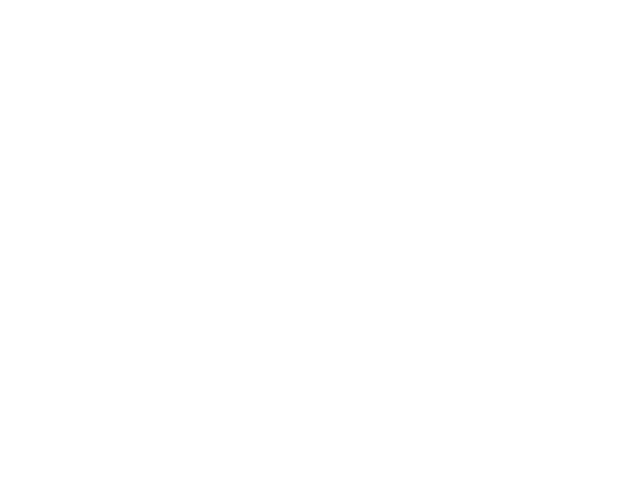

In [8]:
# plt.figure()
fig = plt.figure(0)
cid = fig.canvas.mpl_connect('button_press_event', draw)
cid = fig.canvas.mpl_connect('key_press_event', turn)
plt.show()